In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 假如某个项目有5个特征，这五个特征分别为：
f1=np.random.normal(size=250)
f2=np.random.normal(size=250)
# 后面的三个特征是前面两个特征演变而来，即与前面两特征具有很强的相关性
f3=2*f1+3*f2
f4=4*f1-f2
f5=f3+2*f4

In [3]:
# 将这些特征组合成数据集
dataset_X=np.c_[f1,f2,f3,f4,f5]
# 计算各特征列之间的相关系数
df=pd.DataFrame(dataset_X,columns=['f1','f2','f3','f4','f5'])
print(df.corr())

          f1        f2        f3        f4        f5
f1  1.000000 -0.002496  0.528931  0.966354  0.994370
f2 -0.002496  1.000000  0.847342 -0.259627  0.103485
f3  0.528931  0.847342  1.000000  0.292844  0.615884
f4  0.966354 -0.259627  0.292844  1.000000  0.933656
f5  0.994370  0.103485  0.615884  0.933656  1.000000


In [4]:
# 可以看出f1-f5，f1-f4,f2-f3等之间具有强相关性，故而可以用PCA降维
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit(dataset_X) # 用PCA降维
# 打印降维后的新特征
variances=pca.explained_variance_
print(variances) # 可以理解成该特征的重要性，后面三个数字非常小，即特征不重要

[1.15552796e+02 1.14453854e+01 3.08872295e-31 8.39043564e-32
 1.18268234e-32]


In [5]:
# 故而可以为重要性设置一个阈值，小于该阈值的认为该特征不重要，可删除
thresh=0.8
useful_features=variances>thresh
print(useful_features) # 标记为True的表示重要特征，要保留，False则删除

[ True  True False False False]


In [6]:
useful_features_num=np.sum(useful_features) # 计算True的个数

# 进行PCA降维之后的新数据集为：
pca.n_components=useful_features_num # 即设置PCA的新特征数量为n_components
new_dataset_X=pca.fit_transform(dataset_X)
print('before PCA, dataset shape: ', dataset_X.shape)
print('after PCA, dataset shape: ', new_dataset_X.shape)

before PCA, dataset shape:  (250, 5)
after PCA, dataset shape:  (250, 2)


### 使用核PCA来解决非线性数据集的降维问题


In [7]:
# 准备数据集
from sklearn.datasets import make_circles
dataset_X,dataset_y=make_circles(n_samples=500,factor=0.2,noise=0.04)
print(dataset_X.shape)

(500, 2)


In [8]:
def visual_2D_dataset(dataset_X, dataset_y, title):
    '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
    assert dataset_X.shape[1] == 2, 'only support dataset with 2 features'
    classes = list(set(dataset_y))
    markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8'
        , 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|']
    # colors=['b','c','g','k','m','w','r','y']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for class_id in classes:
        one_class = np.array([feature for (feature, label) in
                              zip(dataset_X, dataset_y) if label == class_id])
        plt.scatter(one_class[:, 0], one_class[:, 1], marker=markers[class_id % len(markers)],
                    c=colors[class_id % len(colors)], label='cls_' + str(class_id))
    plt.title(title)
    plt.legend()

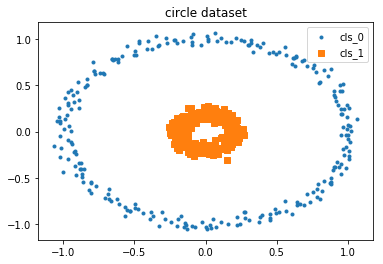

In [9]:
visual_2D_dataset(dataset_X,dataset_y,'circle dataset')

(500, 2)


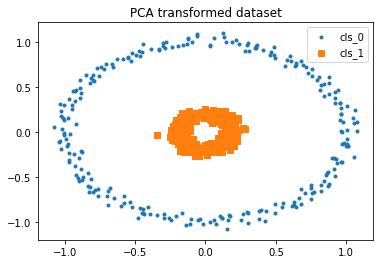

In [10]:
# 如果用普通的PCA来降维
from sklearn.decomposition import PCA
pca = PCA()
dataset_X_pca = pca.fit_transform(dataset_X)
print(dataset_X_pca.shape)
visual_2D_dataset(dataset_X_pca,dataset_y,'PCA transformed dataset')
# 从图中几乎看不出PCA降维前后有啥区别

(500, 464)


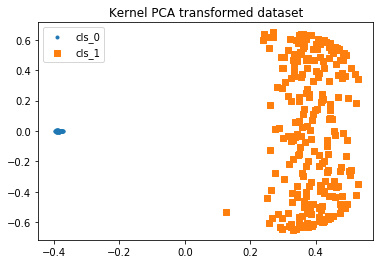

In [11]:
# 用核PCA方法来降维
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kernel_pca = kernel_pca.fit_transform(dataset_X)
print(X_kernel_pca.shape) # 2维特征变成了465维，降维？增维？
visual_2D_dataset(X_kernel_pca[:,:2],dataset_y,'Kernel PCA transformed dataset')

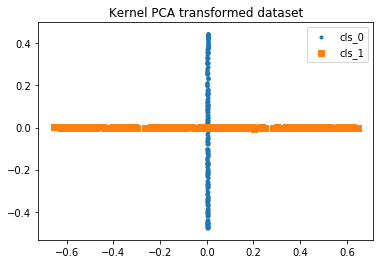

In [12]:
visual_2D_dataset(X_kernel_pca[:,2:4],dataset_y,'Kernel PCA transformed dataset')

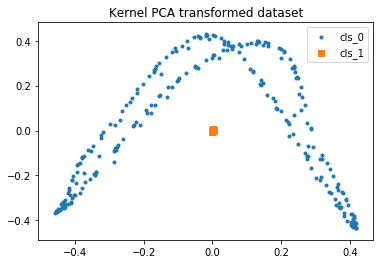

In [13]:
visual_2D_dataset(X_kernel_pca[:,4:6],dataset_y,'Kernel PCA transformed dataset')

(500, 2)


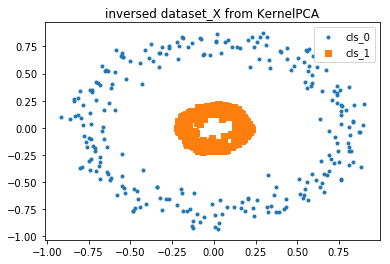

In [14]:
# 如何从Kernel PCA得到的数据集反向计算出原始的数据集
dataset_X_inverse = kernel_pca.inverse_transform(X_kernel_pca)
print(dataset_X_inverse.shape)
visual_2D_dataset(dataset_X_inverse,dataset_y,'inversed dataset_X from KernelPCA')